Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.


In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

In [3]:
# # the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = x_train.reshape(60000, 784)
# x_test = x_test.reshape(10000, 784)
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# # convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
y_train


# print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [4]:
mnist = tf.keras.datasets.mnist
(x_train_, y_train_), (x_test_, y_test_)=mnist.load_data()
print(x_train_.shape,y_train_.shape,x_test_.shape,y_test_.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


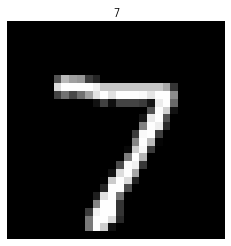

In [5]:
import matplotlib.pyplot as plt 
plt.title(y_test_[0])
plt.axis("off")
plt.imshow(x_test_[0], cmap='gray')

In [6]:
import numpy as np
oneHotEnc=np.eye(10)
y_test=np.array([oneHotEnc[i] for i in y_test_])
y_train=np.array([oneHotEnc[i] for i in y_train_])

x_train=np.array([ i.reshape([784]) for i in x_train_])
x_test=np.array([ i.reshape([784]) for i in x_test_])
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Epoch 1/20
469/469 [==============================] - 13s 28ms/step - loss: 3.3344 - accuracy: 0.8637 - val_loss: 0.4511 - val_accuracy: 0.9244
Epoch 2/20
469/469 [==============================] - 13s 28ms/step - loss: 0.5842 - accuracy: 0.9067 - val_loss: 0.2707 - val_accuracy: 0.9460
Epoch 3/20
469/469 [==============================] - 13s 28ms/step - loss: 0.4527 - accuracy: 0.9204 - val_loss: 0.2244 - val_accuracy: 0.9504
Epoch 4/20
469/469 [==============================] - 13s 27ms/step - loss: 0.4070 - accuracy: 0.9270 - val_loss: 0.1990 - val_accuracy: 0.9552
Epoch 5/20
469/469 [==============================] - 13s 27ms/step - loss: 0.3636 - accuracy: 0.9348 - val_loss: 0.2321 - val_accuracy: 0.9475
Epoch 6/20
469/469 [==============================] - 13s 28ms/step - loss: 0.3516 - accuracy: 0.9387 - val_loss: 0.2179 - val_accuracy: 0.9636
Epoch 7/20
469/469 [==============================] - 13s 28ms/step - loss: 0.3223 - accuracy: 0.9435 - val_loss: 0.2010 - val_accuracy:

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3799906373023987
Test accuracy: 0.9664999842643738
